In [1]:
# 2023.5.1
# reconstructed code 

# no random init
# 1D sine function

In [ ]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train


In [ ]:
import torch.multiprocessing as mp
num_processes = 10


width_vector = [10, 20, 40, 80, 160, 320]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 10
    
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()

            result_matrix[i, idx, :] = [error, error_infty]

    i += 1

    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[1.59680903e-01 1.28170383e+00]
  [4.83536452e-01 1.26786017e+00]
  [4.26774502e-01 1.15052712e+00]
  [9.84359622e-01 1.88217521e+00]
  [2.98615247e-01 8.67640793e-01]
  [1.38156444e-01 9.57621157e-01]
  [2.69486576e-01 9.72459018e-01]
  [5.71136773e-01 1.20820010e+00]
  [2.47218952e-01 9.57999229e-01]
  [1.20403379e-01 1.03199828e+00]]

 [[6.35455996e-02 5.15408337e-01]
  [2.89818347e-02 3.40456247e-01]
  [7.35333934e-02 5.31752467e-01]
  [4.16755863e-02 6.67290211e-01]
  [2.48306263e-02 3.74078810e-01]
  [2.75402889e-03 1.06603086e-01]
  [9.55953598e-02 6.95710421e-01]
  [1.31022343e-02 2.30565727e-01]
  [5.37827704e-03 1.57251537e-01]
  [5.81718050e-02 4.89197314e-01]]

 [[6.84160516e-02 5.39155900e-01]
  [1.18485158e-02 2.83833951e-01]
  [2.17953011e-01 9.70654011e-01]
  [8.18931218e-03 1.64513409e-01]
  [2.51249131e-03 1.21820420e-01]
  [2.03111395e-03 1.22578904e-01]
  [1.51164075e-02 3.31024945e-01]
  [4.55258461e-03 1.34324193e-01]
  [2.25776881e-02 2.94531822e-01]
  [1.28052

(6, 10, 2)
1.1300571181305326
<class 'numpy.ndarray'>
0.0
[0.30112827 0.02617985 0.01308292 0.00418102 0.00145623 0.00041174]
[1.13005712 0.35369361 0.25891502 0.15359923 0.08704742 0.05058426]
y_min: [0.12040338 0.00275403 0.00203111 0.00101132 0.00041572 0.00020695]
y_max: [0.98435962 0.09559536 0.21795301 0.02638162 0.00467958 0.00121761]
[[1.80724890e-01 2.34258223e-02 1.10518020e-02 3.16970490e-03
  1.04050909e-03 2.04791035e-04]
 [6.83231353e-01 6.94155086e-02 2.04870095e-01 2.22005912e-02
  3.22335131e-03 8.05863198e-04]]


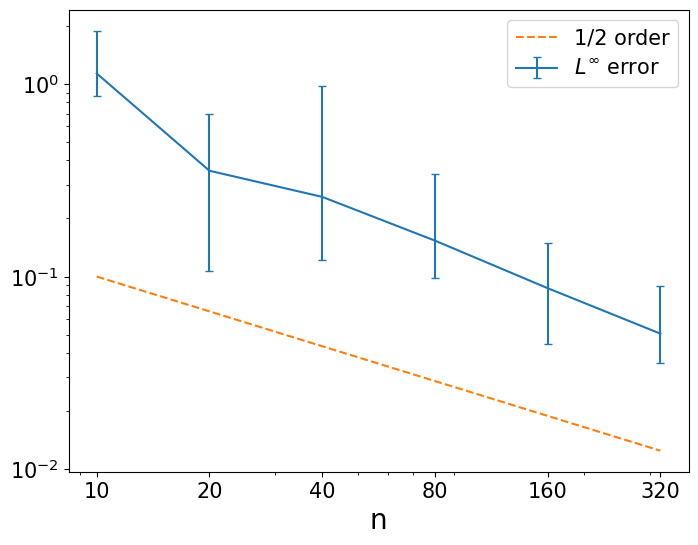

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()